Teste 2 - Transformação de dados
--------------------------------------------------------------------------
#### Objetivos:
1- Extrair do pdf do anexo I do teste 1 acima os dados da tabela Rol de Procedimentos e Eventos em Saúde (todas as páginas);

2- Salvar dados em uma tabela estruturada, em csv;

3- Zipar o csv num arquivo "Teste_{seu_nome}.zip".

<> Bônus:
Com a legenda no rodapé substituir os dados abreviados das colunas OD e AMB para as respectivas descrições.

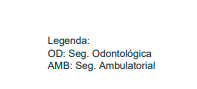


In [2]:
from zipfile import ZipFile
import pandas as pd
import tabula
import os

In [22]:
url = "https://www.gov.br/ans/pt-br/arquivos/assuntos/consumidor/o-que-seu-plano-deve-cobrir/Anexo_I_Rol_2021RN_465.2021_RN473_RN478_RN480_RN513_RN536.pdf"
file = "Rol_de_procedimentos_e_eventos_em_saude.csv"

def get_file(url, file): #Função para obter o arquivo como pedido no <bônus> o arquivo pdf em um arquivo cvs
    tabula.convert_into(url,file, output_format='csv', pages='all') # Converter o arquivo pdf em csv 
    
    file_mod = pd.read_csv(file, encoding='ISO-8859-1',on_bad_lines='skip') #Ler o arquivo csv, ISO-LATIN-1(ISO-8859-1)
                                                                            #é o conjunto de caracteres padrão da maioria dos navegadores        
                                                                            #on_bad_lines se caso essas "linhas ruins" for True pular elas.
            
    file_mod.rename(columns={'OD':'Seg.Odontologica','AMB':'Seg.Ambulatorial'},inplace=True) #Renomeando as variáveis
    file_mod = file_mod.loc[~(file_mod.PROCEDIMENTO=='PROCEDIMENTO')].reset_index(drop=True) #Filtrando dados (tirando cabeçalho)
    file_mod.to_csv(file,sep=";") #Transformando o arquivo novamente para csv
    print('Programa Finalizado')
    
def zipar_file():
    with ZipFile("Teste2_Pedro_Afonso.zip","w") as myzip:
        for file in os.listdir():
            if file.startswith('Rol'):
                myzip.write(file)
                os.remove(file)

get_file(url,file)
zipar_file()

Programa Finalizado
